In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
def lu_decomp(A):
    (n, m) = np.shape(A)
    assert(n == m)
    p = list(range(n))
    
    for k in range(n - 1):
        i = np.argmax(np.abs(A[k:,k])) + k
        p[k], p[i] = p[i], p[k]
        A[[k,i],:] = A[[i,k],:]
        for j in range(k + 1, n):
            l = (A[j, k] / A[k, k])
            A[j, k] = l
            A[j, k + 1:] = A[j, k + 1:] - A[k, k + 1:] * l
    return p


In [153]:
def lu_solve(p, A, b):
    (n, m) = np.shape(A)
    assert(n == m)
    b = b[p]
    y = np.zeros(np.shape(b))
    for i in range(n):
        y[i,:] = b[i,:]
        for j in range(i):
            y[i,:] = y[i,:] - A[i, j] * y[j,:]
        y[i,:] = y[i,:]
        
    x = np.zeros(np.shape(b))
    for i in range(n - 1, -1, -1):
        x[i,:] = y[i,:]
        for j in range(n - 1, i, -1):
            x[i,:] = x[i,:] - A[i, j] * x[j,:]
        x[i,:] = x[i,:] * (1. / A[i,i])
        
    return x

In [154]:
A = np.array([[3., 1., 6.], [2., 1., 3.], [1., 1., 1.]])
p = lu_decomp(A)
b = np.array([[2.], [7.], [4.]])
lu_solve(p, A, b)

array([[ 19.],
       [ -7.],
       [ -8.]])

In [155]:
A = np.array([[3., 1., 6.], [2., 1., 3.], [1., 1., 1.]])
p = lu_decomp(A)
b = np.array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])
lu_solve(p, A, b)

array([[-2.,  5., -3.],
       [ 1., -3.,  3.],
       [ 1., -2.,  1.]])

In [158]:
n = 1024
A = np.random.rand(n, n)
Ao = A.copy()
p = lu_decomp(A)
b = np.identity(n)
X = lu_solve(p, A, b)
np.linalg.norm(Ao.dot(X) - b, np.inf)

6.8392309596872014e-11

In [159]:
def cond_inf(A):
    Ao = A.copy()
    p = lu_decomp(A)
    b = np.identity(A.shape[0])
    X = lu_solve(p, A, b)
    return np.linalg.norm(Ao, np.inf) * np.linalg.norm(X, np.inf)

In [160]:
cond_inf(np.array([[0.5, 0.5], [0.5, -1.]]))

3.0

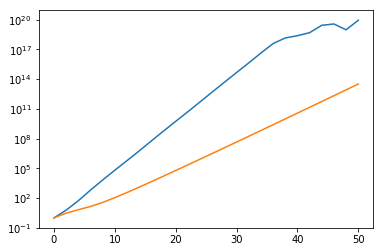

In [197]:
def vandermonde(f, n, a, b):
    x = np.linspace(-1, 1, n)
    v = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            v[i, j] = f(j, x[i])
             
    return v

n = np.arange(1, 53, 2)
monom = lambda i, x: x**i
tscheby = lambda i, x: np.cos(i * np.arccos(x))
plt.semilogy(n - 1, list(map(lambda n: cond_inf(vandermonde(monom, n, -1, 1)), n)))
plt.semilogy(n - 1, list(map(lambda n: cond_inf(vandermonde(tscheby, n, -1, 1)), n)))